# Statistics

In [0]:
#USE SAMPLE VARIANCE ON THIS ASSIGNMENT, NOT POPULATION + SAMPLE DEVIATION

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [9]:
import statistics
import math
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
mean = sum(sales)/len(sales)
var = std = sum((mean - value) ** 2 for value in sales) / (len(sales) - 1)
stdsales = var ** .5
# var_np = np.var(sales, ddof=1)
# sqrt = math.sqrt(var_np)
# sqrt_2 = (var_np)**(.5)
  
# mean = statistics.mean(sales) 
print("Mean is :", mean) 

print("Variance of sample set is:", var) 
#       %(statistics.variance(sales))) 

print("Standard Deviation of sample is:", stdsales)
#                 % (statistics.stdev(sales))



Mean is : 3052.714285714286
Variance of sample set is: 214387.90476190473
Standard Deviation of sample is: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [21]:
#if you get corr value bigger than 1, youve used population variance
import os
import pandas as pd
import numpy as np
customers =  [127, 80, 105, 92, 120, 115, 93]

salescustdata = {"Sales":sales, "Customers":customers}

df = pd.DataFrame(salescustdata)

df.cov()
# np.corr(df)

,Sales,Customers
Sales,214387.904762,7604.357143
Customers,7604.357143,290.952381


In [11]:
df.corr()

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [26]:
#find correlation coefficient
# np library
mean = sum(customers)/len(customers)
var = std = sum((mean - value) ** 2 for value in customers) / (len(customers) - 1)
stdcustomers = var ** .5

np.cov(sales, customers)[0,1] / (stdcustomers * stdsales)
# coef = stdcustomers * stdsales

0.9628339778148909

In [24]:
stdcustomers

17.057326313123664

In [0]:
salescuststd = (stdsales)

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [29]:
!wget ('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

/bin/bash: -c: line 0: syntax error near unexpected token `'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv''
/bin/bash: -c: line 0: `wget ('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')'


In [34]:
#Cabin, body, unnamed, name, boat, 
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.corr()



,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [35]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

<function matplotlib.pyplot.show>

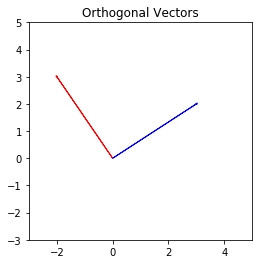

In [44]:
#Orthogonal = having a set of perpendicular axes that meet at a right angle
import matplotlib.pyplot as plt
orthvector1 = [-2,3]
orthvector2 = [3,2]
plt.figure(figsize=(4,4))
plt.arrow(0,0, orthvector1[0], orthvector1[1], head_width=.05,  head_length=0.05, color ='red')
plt.arrow(0,0, orthvector2[0], orthvector2[1], head_width=.05,  head_length=0.05, color ='blue')
plt.xlim(-3,5)
plt.ylim(-3,5)

plt.title("Orthogonal Vectors")
plt.show

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [46]:
#No, these are not orthogonal
a = [-5, 3, 7]
b = [6, -8, 2]
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [53]:
import numpy as np

c = np.array([2, -15, 6, 20])
np.linalg.norm(c)**2


665.0

In [54]:
np.dot(c,c)

665

In [56]:
#They're the same number
np.matmul(c.T,c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}



\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}




__________________________________
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}= 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [63]:
f = np.array([4,12,11,9,2])

# np.linalg.norm(f)

unitvector = f / np.linalg.norm(f)
unitvector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

<function matplotlib.pyplot.show>

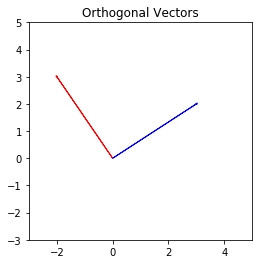

In [64]:
import matplotlib.pyplot as plt
orthvector1 = [-2,3]
orthvector2 = [3,2]
plt.figure(figsize=(4,4))
plt.arrow(0,0, orthvector1[0], orthvector1[1], head_width=.05,  head_length=0.05, color ='red')
plt.arrow(0,0, orthvector2[0], orthvector2[1], head_width=.05,  head_length=0.05, color ='blue')
plt.xlim(-3,5)
plt.ylim(-3,5)

plt.title("Orthogonal Vectors")
plt.show

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

<function matplotlib.pyplot.show>

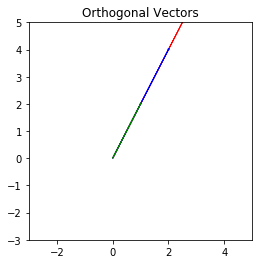

In [67]:
depvector1 = [1,2]
depvector2 = [2,4]
depvector3 = [4,8]
plt.figure(figsize=(4,4))
plt.arrow(0,0, depvector3[0], depvector3[1], head_width=.05,  head_length=0.05, color ='red')
plt.arrow(0,0, depvector2[0], depvector2[1], head_width=.05,  head_length=0.05, color ='blue')
plt.arrow(0,0, depvector1[0], depvector1[1], head_width=.05,  head_length=0.05, color ='green')
plt.xlim(-3,5)
plt.ylim(-3,5)

plt.title("Orthogonal Vectors")
plt.show

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

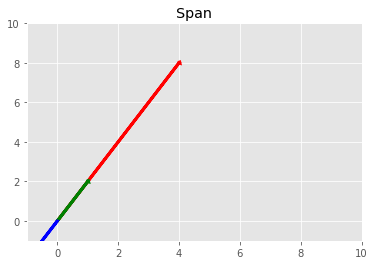

In [71]:
#compose in matrix (Pbelow) 7.1 and 5.2 same answer
g = [1,2]
h = [4,8]
i = [-20,-40]
plt.xlim(-1,10);
plt.ylim(-1,10);
plt.arrow(0,0, h[0], h[1], linewidth=3, head_width=.07, head_length=0.05, color ='red')
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=.07, head_length=0.05, color ='green')
plt.arrow(0,0, i[0], i[1], linewidth=3, head_width=.07, head_length=0.05, color ='blue')
plt.style.use('ggplot')
plt.title("Span")
plt.show();




## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [73]:
P = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])
np.linalg.matrix_rank(P.T)

#can span all of 3d vector space whereas g&h can only move along one straight line

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



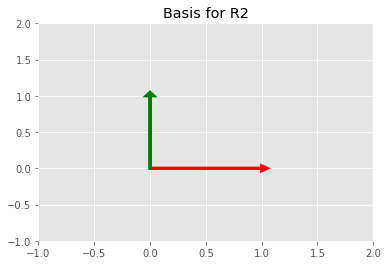

In [74]:
a = [1,0]
b = [0,1]
plt.xlim(-1,2);
plt.ylim(-1,2);
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.07, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.07, head_length=0.05, color ='green')
plt.style.use('ggplot')
plt.title("Basis for R2")
plt.show();


## 6.2 What does it mean to form a basis?

An orthogonal basis is a set of vectors that are linearly independent, span the vector space, and are orthogonal to each other.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [72]:
P = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

##The dimension of the vector space spanned by it's columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()